In [1]:
import numpy as np
import matplotlib.pyplot as plt
#magic command for enabling tensorflow 1.x
%tensorflow_version 1.x 
import tensorflow as tf
from tensorflow.python.framework import ops
import timeit

TensorFlow 1.x selected.


# Deep Learning Basics: core components of Neural Networks

- Goodfellow, I., Bengio, Y., Courville, A. (2016). Deep learning (Vol. 1). Cambridge: MIT press. ([available online](https://www.deeplearningbook.org/)).
- Chapter 3, Section 1 of [Deep Learning with Python, 1st edition](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 
- [Stanford Class CS231n](http://cs231n.github.io/neural-networks-1/)

**Deep learning** is a branch of machine learning and consists in a
set of algorithms and techniques for learning in deep neural networks.

**Deep Neural Networks** consists of *many* hidden layers of information processing, in contrast with *shallow* Neural Networks. 

Here is an illustration reporting toy models of *shallow* and *deep* feedforward Neural Networks 
![non_deep_vs_deep](https://i.stack.imgur.com/OH3gI.png)

NNs key feature is the weighted interconnection of several simple Action Units in order to calculate complex functions

Feed-Forward neural networks represent a **universal approximation framework**: in fact, the *universal approximation theorem* states that:

>*for a big enough neural network, it always exists a parameters configuration that makes the network able to approximate any continuous function defined on a compact set of the nth-dimensional vector space over the real numbers.*


Obviously, it is not guaranteed that the training procedure will guide the
model to that parameters configuration.

## Biological Neuron
<img src="http://cs231n.github.io/assets/nn1/neuron.png" width="400"/>


## Mathematical Model
<img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" width="400"/>

## Action Units: Activation Functions

The mathematical neuron model is a coarse approximation of the biological neuron. Its activation function takes the **weighted sum** of the inputs and generates an output signal.

-  an action unit receives input signal $x_i$ for each $i$ preceding unit;
- the output $y_k$ of the neuron $k$ is a non linear function $f$ of its weighted input:
$$y_k = f\Big(\sum_i(w_i\cdot x_i)+b\Big)$$

- the weight $w$ represents the strength of the synaptic connection between two action units. It is a learnable parameter and can result in an excitatory effect (positive weight) or inhibitory effect (negative weight);
- the bias $b$ is equivalent to a threshold;
- $f$ represents the activation function. This non-linearity allows a neural network to compute non linear functions of its input. The most common functions used are: Sigmoid, Hyperbolic Tangent, ReLU (Rectified Linear Unit);
- the output of a unit represents an input for following units.

A good activation function has several properties:

1. it is **continuous** and has an **infinite domain**, so to have an output number for *any* input;
2. it is **monotonic**. With a parabola, for example, we may have the same output value for two different input values;
3. it is **non-linear**: a NN with plenty of layers, but using only linear activation functions is equivalent to a NN with only one linear layer;
4. it should be **efficiently computable**.

The activation function characterizes the Neuron Unit. Some popular examples of activation function are presented in the following.

In [ ]:
# snippets from https://github.com/nfmcclure/tensorflow_cookbook/blob/master/01_Introduction/06_Implementing_Activation_Functions/06_activation_functions.ipynb
ops.reset_default_graph()
sess = tf.Session()
x_vals = np.linspace(start=-10., stop=10., num=100)

**Step Function**: The trivial step function is seldom used in practice:
during the learning procedure it is desirable that small changes in input determine small changes in output

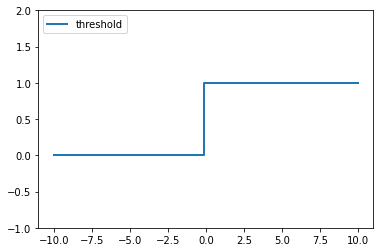

In [ ]:
plt.step(x_vals,[1 if x>0 else 0 for x in x_vals ], label='threshold', linewidth=2)
plt.ylim([-1,2])
plt.legend(loc='upper left')
plt.show()


**Sigmoid** guarantees the above mentioned property: output values between 0 and 1

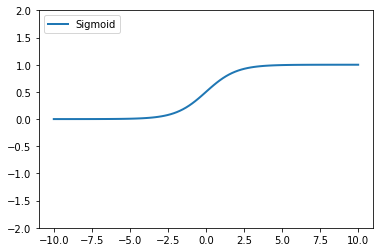

In [ ]:
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
plt.plot(x_vals, y_sigmoid, label='Sigmoid', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

**Tanh** is similar to sigmoid, but its output is zero-centered: produces values between -1 and 1

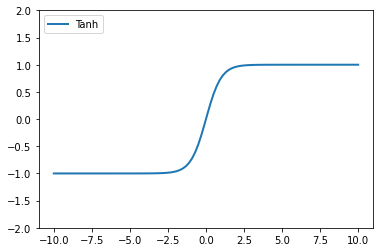

In [ ]:
y_tanh = sess.run(tf.nn.tanh(x_vals))
plt.plot(x_vals, y_tanh, label='Tanh', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

**ReLU** (Rectified Linear Unit) is the most popular choice for many deep architectures (mainly Convolutional Neural Networks)


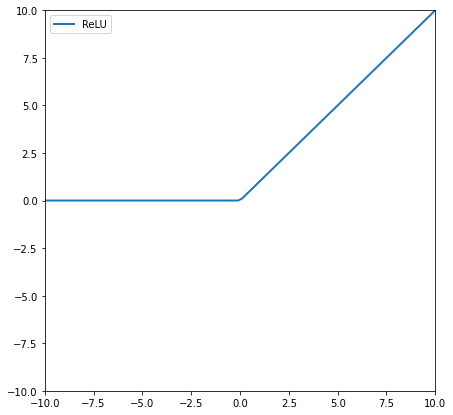

In [ ]:
plt.figure(figsize = (7,7))
y_relu = sess.run(tf.nn.relu(x_vals))
plt.plot(x_vals, y_relu, label='ReLU', linewidth=2)
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.legend(loc='upper left')
plt.show()

$f(x)=\max(0,x)$,
- it does not require expensive computation, by only thresholding the activations at zero; 
- it allows to avoid *vanishing gradient problem*: it is a phenomenon by which the gradient tends to get smaller as we move backward through the hidden layers. As a consequence, the update term for neurons in earlier layers will tend to zero, and learning will be very slow. The reason behind this phenomenon lays in the shape of the derivative of the activation function. Saturation of sigmoid units takes place both for small and big input, and indeed its derivative tends to zero. Thanks to the shape of its derivative, ReLU activation allows avoiding this problem.  
- it allows a sparse representation that, in turn, guarantees 
  - information disentangling: small changes of the input do not affect the features representation, as is the case of a dense representation.  A dense representation is highly entangled because almost any change in the input modifies most of the entries in the representation vector. Instead, if a representation is both sparse and robust to small input changes, the set of non-zero features is almost always roughly conserved by small changes of the input.
  - efficient variable-size representation: the model itself can reduce its representational power, i.e. the number of active neurons, depending on the input;
  - easier linear separability of representation,  because the information is represented in a high-dimensional space. 
- A drawback of these units is the fact that they do not learn when they have negative input: when too many units lie in this region, the effective capacity of the model could be dramatically reduced.

### Output units

The desired distribution in the output layer guides the choice of the output units.

For Multinoulli output distribution (n-way classification problem), softmax units are chosen. 
Given the input $z = wx + b$, the softmax activation is computed as:

  
$$softmax(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [0.7, 1.4, 3]
print(softmax(scores))
print(sum(softmax(scores)))


[0.07699453 0.15504795 0.76795752]
1.0


## Loss Function

The learning procedure aims at minimizing the loss function. It is chosen in conjunction with the task and the output units.

For example, when we deal with a **regression** task we may choose *Mean Squared Error* loss (MSE).

The most common cost function for **classification** is the *Cross-Entropy* between training data and model prediction. 

Consider for simplicity a binary classification problem: given $x$ the input example, $a$ the related output activation and $y$ the true label, the sum over the whole training set of size $N$, the cross-entropy is:

$$C = -\frac{1}{N}\sum_{x}[{y\ln(a) + (1 − y)\ln(1 − a)}]$$

When $y$ and $a$ have the same value, the cost function is zero.<br>
When $y$ and $a$ have different value, the cost function of the single example becomes
positive.



## Forward Propagation

During the forward step, the network accepts an input and computes the related output. In the figure at the top of this notebook, the information flows form left to right.
This step produces a scalar cost that is the task-related cost function (e.g. the cross-entropy) plus, possibly, a regularization term (we will see it in the next notebook).

## Backpropagation

- check [this post](http://neuralnetworksanddeeplearning.com/chap2.html)

Gradient descent algorithm requires that the **gradient of the scalar cost is calculated with respect to the weights of the network**. This step is efficiently accomplished by the back-propagation algorithm, which originates from the chain rule of calculus.

It provides an expression for the partial derivative $∂f(w)/∂w$ of the cost function $f$ with respect to any weight $w$ (or bias $b$) in the network: in other words, it expresses how a change in weights and biases affects the cost.


## Gradient Based Learning

When we train a neural network *from scratch*, the parameters (weights) of the network are randomly initialized. The optimization procedure aims to **minimize a cost function** by updating the weights in order to find a configuration that implements the desired function.

Optimization is achieved using Gradient Descent, an iterative method from calculus. Given $f(x)$ the cost function we want to minimize by altering the parameters $x$, and given $ε$ the **learning rate** that defines the size of the step, the method updates the parameters at a new iteration using the following formula:
$$∆x =- ε∇_x f (x) $$
$$x ← x + ∆x$$




Back-propagation allows to compute the gradient of the cost function of a single example, but theoretically the average value over the entire training set is needed. In practice, the gradient in the formula can be evaluated by averaging over $n$ examples, and this value identifies three possible scenarios:
- **online gradient descent**: optimization uses one example at a time; ($n = 1$)
- **deterministic gradient descent**: all the training examples are used; ($n = $Training set size)
- **minibatch** or **stochastic gradient descent**: a minibatch (or simply **batch**) of $n$ examples is used. ($1 < n < $Training set size)

Stochastic gradient descent is a common choice in most practical applications: higher values of $n$ guarantee a better estimate of the gradient, while lower values imply lower computation time. Actually, there are several hardware-related issues: the computation over a batch of n examples can be performed more efficiently that $n$ computations of single examples thanks to parallel computing. On
the other hand, big values of $n$ require a relevant amount of memory.

When the network performs the forward and backward pass on a single batch of examples, it is said to have executed a **step** or an **iteration**. 

An **epoch** of training is composed by a number of steps that allow the network to see all the training examples.

### Improving the optimization strategy 

Stochastic Gradient Descent is (\*was\*) the most popular method for optimization in DNN. Nevertheless several variants have been proposed in order to accelerate learning: **momentum** algorithm, for example, represents a common choice in convolutional neural networks. The update rule is:
$$∆x = α∆x − ε∇ x f (x)$$
$$x ← x + ∆x$$
The only difference between this formulation and the classic SGD
is given by the term $α∆x$: it can be considered a velocity term in the parameters space. The relationship between $α$ and $ε$ determines how much previous updates influence the current update, contributing to keep the direction of motion in the space parameter and avoiding oscillation. 



### Annealing the learning rate
In practice, it is common to implement a form of learning rate decay: after an initial coarse gradient descent, we may want to reach and settle in the global minimum with smaller and smaller steps in the parameter space.

Three popular implementations are step decay, exponential decay and $1/t$ decay.




### Per-parameter adaptive learning rate methods
The above-mentioned methods update the learning rate globally and equally for all the network parameters. Several algorithms have been proposed for adaptively tuning the learning rate per-parameters. Popular examples are **RMSprop** (Root Mean Square Propagation) and **Adam** (Adaptive Moment Estimation): they are already implemented and available in `tf.keras`.
We will not go into the details of their behavior, but we will frequently encounter some of them in practical applications.

A comparative description of the most popular optimization algorithm can be found [here](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms).

# First Steps: Tensorflow and GPU
**Why do we use GPUs?**

The following snippets show the computational power of GPU w.r.t. CPU.
Do not worry about the code: we will not put our hands on "low-level" TensorFlow anymore (thanks to `tf.keras` high level API).

Remember to enable GPU:
> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**


In [2]:
# Tensorflow is already installed in Colab
# check if tensorflow is installed
import tensorflow as tf
print(tf.__version__) 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('you must enable GPU! Go to:')
  print('\nRuntime')
  print('\tChange runtime type')
  print('\t\tHardware Accelerator: GPU')

  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

1.15.2
Found GPU at: /device:GPU:0


In [3]:
# utility function to list available compute devices
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14972626261063011468
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5632631609958774252
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17844359562743253010
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7469983335
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8021974394116094027
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [5]:
#snippet from https://colab.research.google.com/notebooks/gpu.ipynb
# See https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True


# our "graph" consists in
# an input (random) image
# a bidimensional convolution operation
# a reduce sum operation, which returns a scalar value

with tf.device('/cpu:0'): #you can specify the device
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7) 
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'): #you can specify the device
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

# in Tensorflow we need a session to run our graph
sess = tf.Session(config=config)
# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)

cpu()
gpu()

# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print(f'GPU speedup over CPU: {int(cpu_time/gpu_time)}x')

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.84613377200003
GPU (s):
0.08270992600000682
GPU speedup over CPU: 34x


## Limitations
The GPUs available in Colab often include Nvidia K80s, T4s, P4s and P100s (there is no way to choose what type of GPU you can connect to in Colab at any given time).
- **Resources available in Colab vary over time to accommodate fluctuations in demand, as well as to accommodate overall growth and other factors.**




In [6]:
!df -h #disk free

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   31G   35G  47% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1        75G   32G   43G  43% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [7]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [8]:
!cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:         7583512 kB
MemAvailable:   11330440 kB
Buffers:           83400 kB
Cached:          3367272 kB
SwapCached:            0 kB
Active:          1666992 kB
Inactive:        3659656 kB
Active(anon):    1391560 kB
Inactive(anon):    14680 kB
Active(file):     275432 kB
Inactive(file):  3644976 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               268 kB
Writeback:             0 kB
AnonPages:       1876076 kB
Mapped:           794372 kB
Shmem:             15292 kB
Slab:             181692 kB
SReclaimable:     134564 kB
SUnreclaim:        47128 kB
KernelStack:        3984 kB
PageTables:        11400 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    4786684 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              952 kB
AnonHugePages:   

## TPU: Tensor Processing Unit
- from [wiki:](https://en.wikipedia.org/wiki/Tensor_processing_unit) TPU are application-specific integrated circuit (ASIC) developed by Google specifically for neural network machine learning.
- https://colab.research.google.com/notebooks/tpu.ipynb
- [Fashion MNIST Example Using TPU](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb) 


 ## Any problem with the environment setup? 

- Try to disconnect and connect from another IP
- Run on your, properly configured, local machine
- Consider [google cloud](https://github.com/cs231n/gcloud) or [amazon AWS](http://cs231n.github.io/aws-tutorial/)


# Further Reading
- Check Michael Nielsen online book: [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html )
- Universal approximation framework
  - [Neural Networks and Deep Learning - Chapter 4](http://neuralnetworksanddeeplearning.com/chap4.html)
- Activation function
  - more on ReLU: [Glorot, Xavier, Antoine Bordes, and Yoshua Bengio. "Deep sparse rectifier neural networks." Proceedings of the fourteenth international conference on artificial intelligence and statistics. 2011.](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf)
- Optimizers:
  - Check [this post](http://ruder.io/optimizing-gradient-descent/) for an overview of gradient descent optimization algorithms
  - Check [this post](https://distill.pub/2017/momentum/) for an interactive explanation of Momentum

